In [41]:
import pennylane as qml

n_wires = 4

# Describe noise
noise_gate = qml.PhaseDamping
noise_strength = 0.1

# Load devices
dev_ideal = qml.device("default.mixed", wires=n_wires)
dev_noisy = qml.transforms.insert(dev_ideal, noise_gate, noise_strength)

from pennylane import numpy as np
qml.drawer.use_style('pennylane_sketch')

np.random.seed(1967)

# Select template to use within circuit and generate parameters
n_layers = 1
template = qml.SimplifiedTwoDesign
weights_shape = template.shape(n_layers, n_wires)
w1, w2 = [2 * np.pi * np.random.random(s) for s in weights_shape]


def circuit(w1, w2):
    template(w1, w2, wires=range(n_wires))
    qml.adjoint(template)(w1, w2, wires=range(n_wires))
    return qml.expval(qml.PauliZ(0))


ideal_qnode = qml.QNode(circuit, dev_ideal)
noisy_qnode = qml.QNode(circuit, dev_noisy)

(<Figure size 1300x500 with 1 Axes>, <Axes: >)


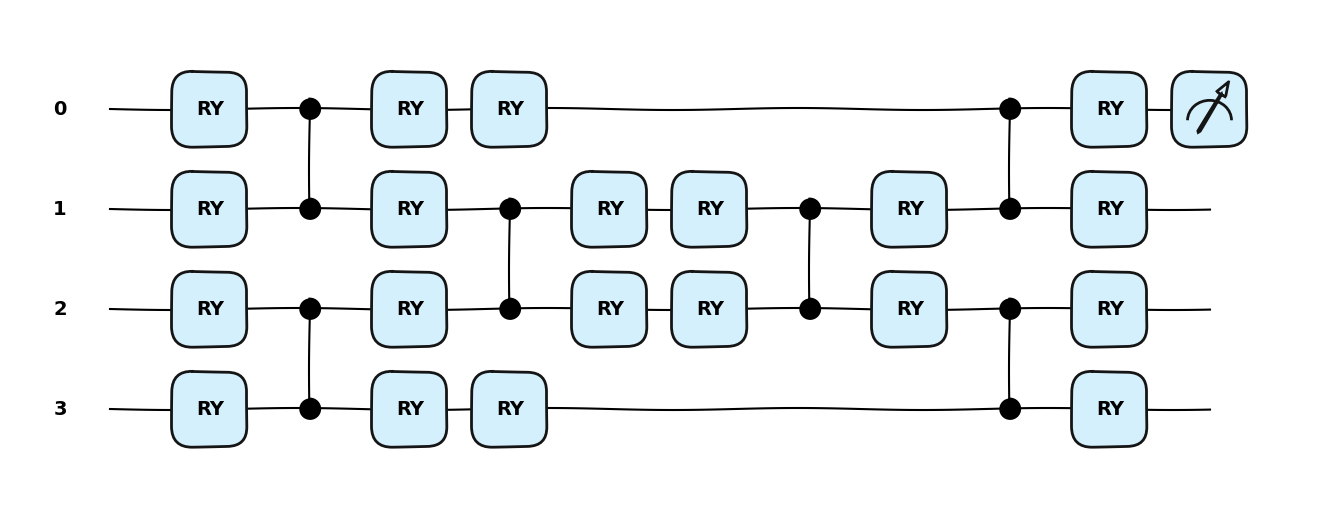

In [42]:
print(qml.draw_mpl(ideal_qnode, expansion_strategy="device")(w1, w2))

(<Figure size 2300x500 with 1 Axes>, <Axes: >)


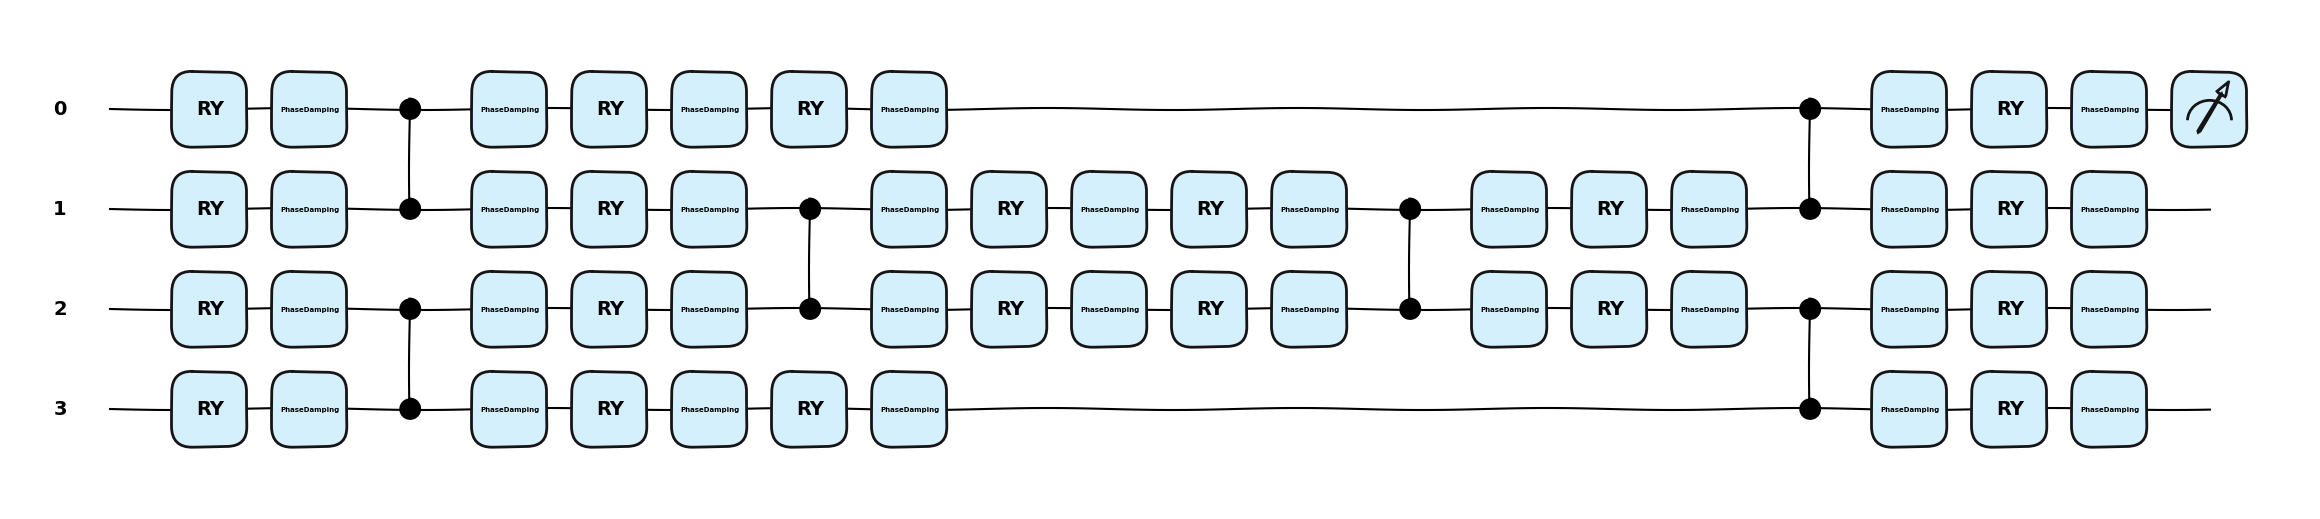

In [43]:
print(qml.draw_mpl(noisy_qnode, expansion_strategy="device")(w1, w2))

In [44]:
ideal_qnode(w1, w2)


tensor(1., requires_grad=True)

In [45]:
noisy_qnode(w1, w2)

tensor(0.71729164, requires_grad=True)

In [46]:
from mitiq.zne.scaling import fold_global
from mitiq.zne.inference import RichardsonFactory
from pennylane.transforms import mitigate_with_zne

extrapolate = RichardsonFactory.extrapolate
scale_factors = [1, 2, 3]

mitigated_qnode = mitigate_with_zne(noisy_qnode, scale_factors, fold_global, extrapolate)
mitigated_qnode(w1, w2)

0.8985196547410798